In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 라이브러리


### 1. 문제정의

### 2. 데이터수집

In [2]:
train = pd.read_csv('./data/Train.csv')
test = pd.read_csv('./data/Test.csv')

In [3]:
train.shape

(6999, 12)

In [4]:
test.shape

(4000, 11)

### 3. 데이터 전처리 및 데이터 탐색
- 결측치 채우기 ( Customer_Shipment, Prior_purchases, Discount_offered)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6999 non-null   int64  
 1   Warehouse_block      6999 non-null   object 
 2   Mode_of_Shipment     6999 non-null   object 
 3   Customer_care_calls  5423 non-null   float64
 4   Customer_rating      6999 non-null   int64  
 5   Cost_of_the_Product  6999 non-null   int64  
 6   Prior_purchases      6049 non-null   float64
 7   Product_importance   6999 non-null   object 
 8   Gender               6999 non-null   object 
 9   Discount_offered     3468 non-null   float64
 10  Weight_in_gms        6999 non-null   object 
 11  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 656.3+ KB


In [6]:
test.isnull()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,False,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3995,False,False,False,False,False,False,False,False,False,True,False
3996,False,False,False,True,False,False,False,False,False,True,False
3997,False,False,False,True,False,False,False,False,False,False,False
3998,False,False,False,False,False,False,False,False,False,False,False


- Customer_care_calls 채우기

In [7]:
train.corr()
# Prior_purchases 랑 Customer_care_calls가 상관관계 가장 높음

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
ID,1.000000,-0.007719,0.007690,0.009738,-0.002985,0.002196,-0.014909
Customer_care_calls,-0.007719,1.000000,0.013420,0.047041,0.173709,-0.158465,-0.070266
Customer_rating,0.007690,0.013420,1.000000,-0.001961,0.008217,-0.016456,0.011275
Cost_of_the_Product,0.009738,0.047041,-0.001961,1.000000,0.028947,-0.139349,-0.012811
Prior_purchases,-0.002985,0.173709,0.008217,0.028947,1.000000,-0.081868,-0.065160
Discount_offered,0.002196,-0.158465,-0.016456,-0.139349,-0.081868,1.000000,0.397393
Reached.on.Time_Y.N,-0.014909,-0.070266,0.011275,-0.012811,-0.065160,0.397393,1.000000


In [8]:
train.drop('ID',axis =1 ,inplace=True)
test.drop('ID',axis =1 ,inplace=True)

In [9]:
test.drop('Gender',axis =1, inplace=True)
train.drop('Gender',axis =1, inplace=True)

In [10]:
train.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
count,5423.000000,6999.000000,6999.000000,6049.000000,3468.000000,6999.000000
mean,4.054582,3.023718,214.249178,3.576294,13.269031,0.594656
std,1.131019,2.149861,208.294273,1.530933,16.070188,0.490993
min,2.000000,1.000000,96.000000,2.000000,1.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,1.000000
max,7.000000,99.000000,9999.000000,10.000000,65.000000,1.000000


In [29]:
def fill_Customer_care_calls(row):
    # 만약 prior purchase가 결측치라면 customer_care_calls를 0으로 채우고 아니면 4로 채우겠다.
    if np.isnan(row['Prior_purchases']):
        return test['Customer_care_calls'].fillna(0,inplace=True)
    else:
        return test['Customer_care_calls'].fillna(4,inplace=True)
    
def fill_Customer_care_calls(row):
    if np.isnan(row['Prior_purchases']):
        return train['Customer_care_calls'].fillna(0,inplace=True)
    else:
        return train['Customer_care_calls'].fillna(4,inplace=True)

In [31]:
train.head(50)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,C,Ship,2.0,2,135,3.0,low,NaN,1339,1
1,F,Flight,5.0,3,225,5.0,low,6.0,1082,0
2,F,Ship,3.0,1,229,3.0,low,NaN,4971,1
3,F,Ship,3.0,2,228,NaN,medium,2.0,5640,0
4,D,Flight,0.0,1,195,6.0,high,NaN,4944,1
5,B,Ship,4.0,5,171,3.0,low,NaN,1683,1
6,A,Ship,6.0,3,282,4.0,low,9.0,1417,1
7,F,Flight,5.0,2,161,3.0,low,NaN,5804,1
8,F,Ship,0.0,1,274,4.0,low,3.0,5979,0
9,C,Ship,5.0,4,222,3.0,low,NaN,5555,0


In [30]:
train.apply(fill_Customer_care_calls, axis = 1)
test.apply(fill_Customer_care_calls, axis = 1)

0       None
1       None
2       None
3       None
4       None
        ... 
3995    None
3996    None
3997    None
3998    None
3999    None
Length: 4000, dtype: object

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6049 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Discount_offered     3468 non-null   float64
 8   Weight_in_gms        6999 non-null   object 
 9   Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 546.9+ KB


In [14]:
train['Prior_purchases'].fillna(0,inplace=True)
test['Prior_purchases'].fillna(0,inplace=True)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Discount_offered     3468 non-null   float64
 8   Weight_in_gms        6999 non-null   object 
 9   Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 546.9+ KB


In [16]:
train.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
count,6999.000000,6999.000000,6999.000000,6999.000000,3468.000000,6999.000000
mean,3.141592,3.023718,214.249178,3.090870,13.269031,0.594656
std,1.964630,2.149861,208.294273,1.877813,16.070188,0.490993
min,0.000000,1.000000,96.000000,0.000000,1.000000,0.000000
25%,2.000000,2.000000,169.000000,2.000000,4.000000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,1.000000
max,7.000000,99.000000,9999.000000,10.000000,65.000000,1.000000


In [17]:
train['Discount_offered'].fillna(7,inplace=True)
test['Discount_offered'].fillna(7,inplace=True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Discount_offered     6999 non-null   float64
 8   Weight_in_gms        6999 non-null   object 
 9   Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 546.9+ KB


In [19]:
train['Mode_of_Shipment'].unique()
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace(' Ship','Ship')
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace(' Flight','Flight')
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace(' Road','Road')
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace(' Shipzk','Ship')
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace(' Flightzk','Flight')
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace(' Roadzk','Road')
train['Mode_of_Shipment']=train['Mode_of_Shipment'].replace('?','Ship')

test['Mode_of_Shipment'].unique()
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace(' Ship','Ship')
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace(' Flight','Flight')
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace(' Road','Road')
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace(' Shipzk','Ship')
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace(' Flightzk','Flight')
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace(' Roadzk','Road')
test['Mode_of_Shipment']=test['Mode_of_Shipment'].replace('?','Ship')

In [20]:
train["Product_importance"].unique()
train["Product_importance"] = train["Product_importance"].replace('loww','low')
train["Product_importance"] = train["Product_importance"].replace('mediumm','medium')
train["Product_importance"] = train["Product_importance"].replace('highh','high')
train["Product_importance"] = train["Product_importance"].replace('?','low')

test["Product_importance"] = test["Product_importance"].replace('loww','low')
test["Product_importance"] = test["Product_importance"].replace('mediumm','medium')
test["Product_importance"] = test["Product_importance"].replace('highh','high')
test["Product_importance"] = test["Product_importance"].replace('?','low')


In [21]:
train['Weight_in_gms'].unique()
train['Weight_in_gms'] = train['Weight_in_gms'].replace('?','0')
test['Weight_in_gms'] = test['Weight_in_gms'].replace('?','0')

In [22]:
train['Weight_in_gms'] = pd.to_numeric(train['Weight_in_gms'])
test['Weight_in_gms'] = pd.to_numeric(test['Weight_in_gms'])


In [23]:
# 0으로 바꿔놨던 값들을 0을제외한 평균값을 넣어주기 
train['Weight_in_gms']= train['Weight_in_gms'].replace(0,3657)
test['Weight_in_gms']= test['Weight_in_gms'].replace(0,3657)

In [24]:
# 이상치 제거 
train['Cost_of_the_Product'][train['Cost_of_the_Product']==9999]
#이상치를 제외한 값의 평균 --> 210.05331618067467
train['Cost_of_the_Product'][train['Cost_of_the_Product']!=9999].mean()

#  평균값으로 변경
train['Cost_of_the_Product']=train['Cost_of_the_Product'].replace(9999,210)
test['Cost_of_the_Product']=test['Cost_of_the_Product'].replace(9999,210)

In [25]:
# 이상치 제거 
train['Customer_rating'][train['Customer_rating']==99]
#이상치를 제외한 값의 평균 --> 2.9962841217664713
train['Customer_rating'][train['Customer_rating']!=99].mean()

#  평균값으로 변경

train['Customer_rating']=train['Customer_rating'].replace(99,2.9)
test['Customer_rating']=test['Customer_rating'].replace(99,2.9)

### 탐색적 데이터 분석(EDA)
- train 데이터를 이용해 탐색

#### 범주형 데이터 시각화
- 빈도기반에 bar chart 많이 활용

### customer_care_calls 컬럼 시각화

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   float64
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Discount_offered     6999 non-null   float64
 8   Weight_in_gms        6999 non-null   int64  
 9   Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 546.9+ KB


<AxesSubplot:xlabel='Customer_care_calls', ylabel='count'>

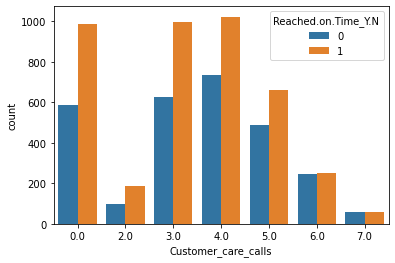

In [27]:
sns.countplot(data=train,
                 x='Customer_care_calls',
                hue='Reached.on.Time_Y.N')
#씨본을 이용해서 카운트플롯을 그릴거야 이때 사용할 데이터는 train데이터이고 train데이터에있는 cabin컬럼을 x축에 넣어

<AxesSubplot:xlabel='Customer_care_calls', ylabel='count'>

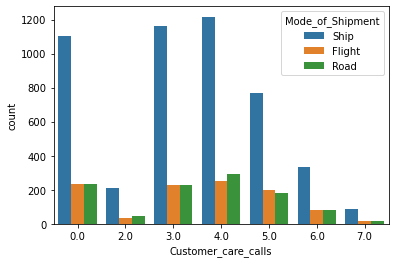

In [28]:
sns.countplot(data=train,
                 x='Customer_care_calls',
                hue='Mode_of_Shipment')

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='count'>

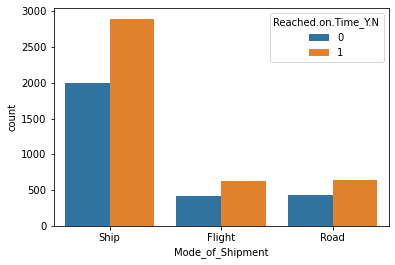

In [29]:
sns.countplot(data=train,
                 x='Mode_of_Shipment',
                hue='Reached.on.Time_Y.N')

<function matplotlib.pyplot.show(close=None, block=None)>

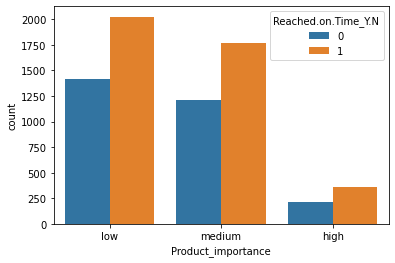

In [30]:
sns.countplot(data=train,
                 x='Product_importance',
                hue='Reached.on.Time_Y.N')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

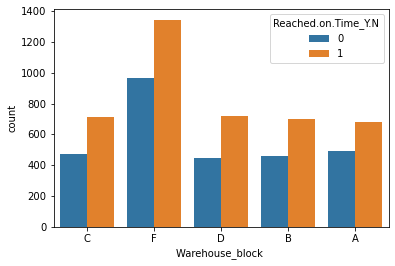

In [31]:
sns.countplot(data=train,
                 x="Warehouse_block ",
                hue='Reached.on.Time_Y.N')

plt.show

In [32]:
train['Reached.on.Time_Y.N'].value_counts()

1    4162
0    2837
Name: Reached.on.Time_Y.N, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

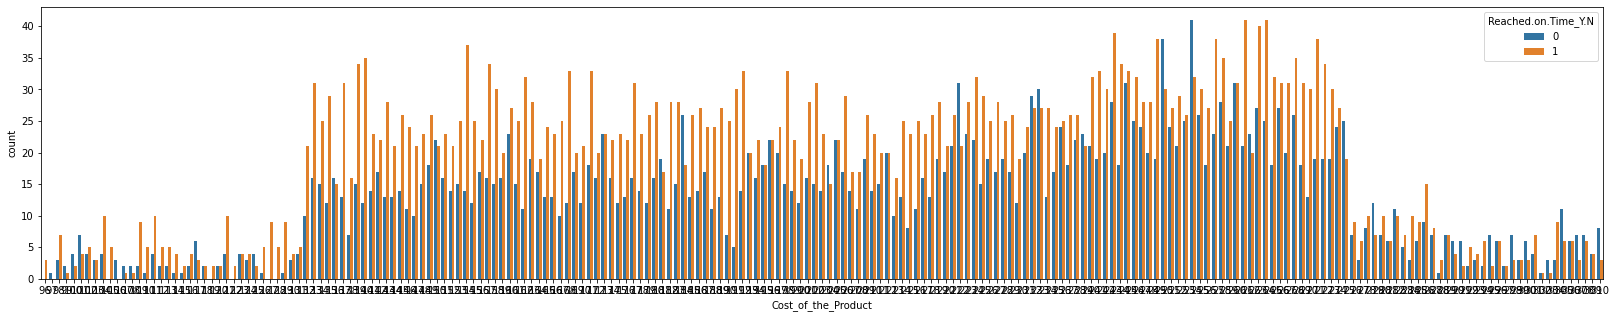

In [33]:
plt.figure(figsize=(28,5))
sns.countplot(data=train,
                 x='Cost_of_the_Product',
                hue='Reached.on.Time_Y.N')

plt.show

In [34]:
train.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,C,Ship,2.0,2.0,135,3.0,low,7.0,1339,1
1,F,Flight,5.0,3.0,225,5.0,low,6.0,1082,0
2,F,Ship,3.0,1.0,229,3.0,low,7.0,4971,1
3,F,Ship,3.0,2.0,228,0.0,medium,2.0,5640,0
4,D,Flight,0.0,1.0,195,6.0,high,7.0,4944,1


### ( 모델링시키기전에) 인코딩 시키기 

In [35]:
train = pd.get_dummies(train)

In [39]:
test = pd.get_dummies(test)